In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Beginning

In [22]:
corpus = "2021" 
metric = "avg_idf"

full_corpus_name = {
    "2020": "misinfo-2020",
    "2021": "C4-2021",
    "2022": "C4-2022",
    "CLEF": "CLEF",
    "clef": "CLEF",
    "CLEF_v2": "CLEF_v2",
    "clef_v2": "CLEF_v2"
}

fields = {
    '2020': 'title',
    '2021': 'query',
    '2022': 'query',
    'CLEF': 'title',
    'clef': 'title',
    "CLEF_v2": "title",
    "clef_v2": "title"
}



In [23]:
scores = pd.read_csv(f"pre_qpp/{full_corpus_name[corpus]}_{metric}_{fields[corpus]}.csv", index_col=0)
scores.head()

,avg_idf
101,5.729880
102,4.495799
103,5.774029
104,5.258631
105,1.782589


In [24]:
scores.describe()

,avg_idf
count,50.000000
mean,4.783731
std,1.365807
min,1.782589
25%,3.824672
50%,4.549807
75%,5.445345
max,9.299535


In [25]:
if metric != "var":
    scores = scores.sort_values(by=metric, ascending=False)

In [26]:
df = scores.reset_index(names="topic")
df.head()

,topic,avg_idf
0,118,9.299535
1,143,7.520282
2,120,7.455101
3,130,7.404953
4,122,7.264616


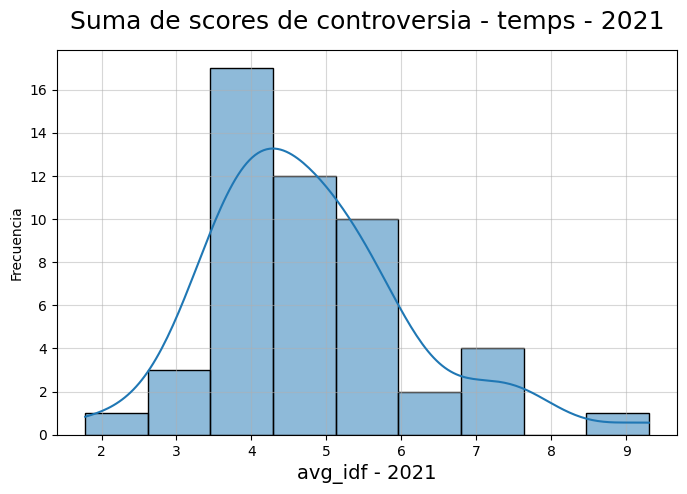

In [27]:
if metric != "var":
    plt.figure(figsize=(8, 5))
    sns.histplot(df[metric], kde=True)
    plt.xlabel(f"{metric} - {corpus}", fontsize=14)
    plt.ylabel("Frecuencia")
    plt.title(f"Suma de scores de controversia - temps - {corpus}", fontsize=18, pad=15)
    plt.grid(True, alpha=0.5)

    plt.show()

In [28]:
comp_2020 = pd.read_csv('compatibility_2020_title.csv')
comp_2021 = pd.read_csv('compatibility_2021_title.csv')
comp_2022 = pd.read_csv('compatibility_2022_title.csv')
comp_clef = pd.read_csv('compatibility_clef_title.csv')
comp_clef_v2 = pd.read_csv('compatibility_clef_layman.csv')

run_name_bm25 = {
    "2020": "all_res_misinfo-2020_bm25_title.csv",
    "2021": "all_res_C4-2021_bm25_query.csv",
    "2022": "all_res_C4-2022_bm25_query.csv",
    "CLEF": "all_res_clueweb-b13_bm25.csv",
    "clef": "all_res_clueweb-b13_bm25.csv",
    "CLEF_v2": "all_res_clueweb-b13_bm25_layman.csv",
    "clef_v2": "all_res_clueweb-b13_bm25_layman.csv"
}

run_name_minilm = {
    "2020": "rerank_bm25-cross-encoder_cross-encoder-ms-marco-MiniLM-L-12-v2_title_cleanhtml.txt",
    "2021": "title-rerank_bm25-cross-encoder_cross-encoder-ms-marco-MiniLM-L-12-v2_title_queries_query_cleanhtml.txt",
    "2022": "rerank_bm25-cross-encoder_cross-encoder-ms-marco-MiniLM-L-12-v2_title_cleanhtml.txt",
    "CLEF": "rerank_MiniLM-L-12-v2_top100_cleanhtml.txt",
    "clef": "rerank_MiniLM-L-12-v2_top100_cleanhtml.txt",
    "CLEF_v2": "rerank_bm25-cross-encoder_cross-encoder-ms-marco-MiniLM-L-12-v2_top100_cleanhtml.txt",
    "clef_v2": "rerank_bm25-cross-encoder_cross-encoder-ms-marco-MiniLM-L-12-v2_top100_cleanhtml.txt"
}

comp_2020 = comp_2020[comp_2020["run"] == run_name_bm25["2020"]]
comp_2021 = comp_2021[comp_2021["run"] == run_name_bm25["2021"]]
comp_2022 = comp_2022[comp_2022["run"] == run_name_bm25["2022"]]
comp_clef = comp_clef[comp_clef["run"] == run_name_bm25["clef"]]
comp_clef_v2 = comp_clef_v2[comp_clef_v2["run"] == run_name_bm25["CLEF_v2"]]

comps = {"2020": comp_2020, "2021": comp_2021, "2022": comp_2022, "clef": comp_clef, "clef_v2": comp_clef_v2}

In [29]:
label_mapping = {
    "misinfo-qrels-graded.helpful-only": "helpful",
    "misinfo-qrels-graded.harmful-only": "harmful",
    "misinfo-qrels.graded-helpful-only": "helpful",
    "misinfo-qrels.graded-harmful-only": "harmful",
    "task1_qtrust_mapped_positive.tsv": "helpful",
    "task1_qtrust_mapped_negative.tsv": "harmful"
}

for comp in comps.values():
    comp["qrels"] = comp["qrels"].map(label_mapping)

comps[corpus]

,run,qrels,p,all,101,102,103,104,105,106,...,141,142,143,144,145,146,147,148,149,150
0,all_res_C4-2021_bm25_query.csv,helpful,0.95,0.1292,0.0839,0.0379,0.0585,0.0000,0.0101,0.3858,...,NaN,NaN,0.0365,0.4666,0.0704,0.563,NaN,NaN,0.0930,NaN
1,all_res_C4-2021_bm25_query.csv,harmful,0.95,0.1454,0.0061,0.0858,0.3721,0.1763,0.0189,0.0000,...,NaN,NaN,0.3377,0.0000,NaN,0.000,NaN,NaN,0.0002,NaN


In [30]:
for key, comp in comps.items():
    comp_diff = comp.loc[:, ~comp.columns.isin(['run', "qrels", "p", 'all'])]

    comp_diff = comp_diff.diff() * (-1)

    comp_diff["run"] = run_name_minilm[corpus]
    comp_diff["qrels"] = "diff"
    comp_diff["p"] = 0.95
    comp_diff["all"] = np.nan
    comp_diff = comp_diff.iloc[1, :]

    comps[key] = pd.concat([comp, comp_diff.to_frame().T])

comps[corpus]
    

/tmp/ipykernel_1619209/1945025442.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comps[key] = pd.concat([comp, comp_diff.to_frame().T])
/tmp/ipykernel_1619209/1945025442.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comps[key] = pd.concat([comp, comp_diff.to_frame().T])
/tmp/ipykernel_1619209/1945025442.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns whe

,run,qrels,p,all,101,102,103,104,105,106,...,141,142,143,144,145,146,147,148,149,150
0,all_res_C4-2021_bm25_query.csv,helpful,0.95,0.1292,0.0839,0.0379,0.0585,0.0,0.0101,0.3858,...,NaN,NaN,0.0365,0.4666,0.0704,0.563,NaN,NaN,0.093,NaN
1,all_res_C4-2021_bm25_query.csv,harmful,0.95,0.1454,0.0061,0.0858,0.3721,0.1763,0.0189,0.0,...,NaN,NaN,0.3377,0.0,NaN,0.0,NaN,NaN,0.0002,NaN
1,title-rerank_bm25-cross-encoder_cross-encoder-...,diff,0.95,NaN,0.0778,-0.0479,-0.3136,-0.1763,-0.0088,0.3858,...,NaN,NaN,-0.3012,0.4666,NaN,0.563,NaN,NaN,0.0928,NaN


In [31]:
if metric != "var":
    new_row = {col: np.nan for col in comps[corpus].columns}
    new_row["run"] = "pre_qpp_method"
    new_row["qrels"] = "helpful"

    for _, row in df.iterrows():
        col_name = str(int(row["topic"]))
        if col_name in new_row:
            new_row[col_name] = float(row[metric])
        else:
            print("ERROR")

    data = pd.concat([comps[corpus], pd.DataFrame([new_row])], ignore_index=True)

/tmp/ipykernel_1619209/1106607786.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([comps[corpus], pd.DataFrame([new_row])], ignore_index=True)


In [32]:
if metric == "var":
    data = comps[corpus]
    
    for i in range(1, 4):
        new_row = {col: np.nan for col in comps[corpus].columns}
        new_row["run"] = "pre_qpp_method"
        new_row["qrels"] = "helpful"

        for _, row in df.iterrows():
            col_name = str(int(row["topic"]))
            if col_name in new_row:
                new_row[col_name] = float(row[f"sigma_{i}"])
            else:
                print("ERROR")

        data = pd.concat([data, pd.DataFrame([new_row])], ignore_index=True)
    

In [33]:
data = data.T
data.head(10)

,0,1,2,3
run,all_res_C4-2021_bm25_query.csv,all_res_C4-2021_bm25_query.csv,title-rerank_bm25-cross-encoder_cross-encoder-...,pre_qpp_method
qrels,helpful,harmful,diff,helpful
p,0.95,0.95,0.95,NaN
all,0.1292,0.1454,NaN,NaN
101,0.0839,0.0061,0.0778,5.72988
102,0.0379,0.0858,-0.0479,4.495799
103,0.0585,0.3721,-0.3136,5.774029
104,0.0,0.1763,-0.1763,5.258631
105,0.0101,0.0189,-0.0088,1.782589
106,0.3858,0.0,0.3858,5.347192


In [34]:
if metric != "var":
    print("Executed 1")
    boxplot_data = data.iloc[4:, :].rename(columns={0: "helpful", 1: "harmful", 2: "diff", 3: "controversy"})
else:
    print("Executed 2")
    boxplot_data = data.iloc[4:, :].rename(columns={0: "helpful", 1: "harmful", 2: "diff", 3: "sigma_1", 4: "sigma_2", 5: "sigma_3"})

boxplot_data.head()

Executed 1


,helpful,harmful,diff,controversy
101,0.0839,0.0061,0.0778,5.72988
102,0.0379,0.0858,-0.0479,4.495799
103,0.0585,0.3721,-0.3136,5.774029
104,0.0,0.1763,-0.1763,5.258631
105,0.0101,0.0189,-0.0088,1.782589


In [35]:
boxplot_data.corr(method="pearson").round(3)   # Pearson correlation

,helpful,harmful,diff,controversy
helpful,1.000,-0.268,0.696,-0.132
harmful,-0.268,1.000,-0.879,0.156
diff,0.696,-0.879,1.000,-0.184
controversy,-0.132,0.156,-0.184,1.000


In [36]:
boxplot_data.corr(method="kendall").round(10)

,helpful,harmful,diff,controversy
helpful,1.000000,-0.261647,0.504032,-0.021849
harmful,-0.261647,1.000000,-0.768460,0.236925
diff,0.504032,-0.768460,1.000000,-0.165323
controversy,-0.021849,0.236925,-0.165323,1.000000


In [37]:
boxplot_data.corr(method="spearman").round(3)

,helpful,harmful,diff,controversy
helpful,1.000,-0.383,0.638,-0.029
harmful,-0.383,1.000,-0.894,0.322
diff,0.638,-0.894,1.000,-0.228
controversy,-0.029,0.322,-0.228,1.000


In [38]:
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import spearmanr

def corr_with_pvalues(df):
    cols = df.columns
    n = len(cols)
    
    # DataFrames to store results
    corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
    pval_matrix = pd.DataFrame(np.ones((n, n)), columns=cols, index=cols)
    
    for i in range(n):
        for j in range(n):
            if i <= j:  # compute only upper triangle and diagonal
                col1 = df.iloc[:, i]
                col2 = df.iloc[:, j]
                # drop NaNs
                valid = col1.notna() & col2.notna()
                if valid.sum() > 1:  # Need at least 2 valid points
                    r, p = pearsonr(col1[valid].astype(float), col2[valid].astype(float))
                    corr_matrix.iloc[i, j] = r
                    corr_matrix.iloc[j, i] = r
                    pval_matrix.iloc[i, j] = p
                    pval_matrix.iloc[j, i] = p
    
    return corr_matrix, pval_matrix


def kendall_corr_with_pvalues(df):
    cols = df.columns
    n = len(cols)

    corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
    pval_matrix = pd.DataFrame(np.ones((n, n)), columns=cols, index=cols)

    for i in range(n):
        for j in range(i, n):  # only upper triangle and diagonal
            col1 = pd.to_numeric(df.iloc[:, i], errors='coerce')
            col2 = pd.to_numeric(df.iloc[:, j], errors='coerce')
            valid = col1.notna() & col2.notna()
            if valid.sum() > 1:
                r, p = kendalltau(col1[valid].astype(float), col2[valid].astype(float))
                corr_matrix.iloc[i, j] = r
                corr_matrix.iloc[j, i] = r
                pval_matrix.iloc[i, j] = p
                pval_matrix.iloc[j, i] = p

    return corr_matrix, pval_matrix


def spearman_corr_with_pvalues(df):
    cols = df.columns
    n = len(cols)

    corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
    pval_matrix = pd.DataFrame(np.ones((n, n)), columns=cols, index=cols)

    for i in range(n):
        for j in range(i, n):  # only upper triangle and diagonal
            col1 = pd.to_numeric(df.iloc[:, i], errors='coerce')
            col2 = pd.to_numeric(df.iloc[:, j], errors='coerce')
            valid = col1.notna() & col2.notna()
            if valid.sum() > 1:
                r, p = spearmanr(col1[valid].astype(float), col2[valid].astype(float))
                corr_matrix.iloc[i, j] = r
                corr_matrix.iloc[j, i] = r
                pval_matrix.iloc[i, j] = p
                pval_matrix.iloc[j, i] = p

    return corr_matrix, pval_matrix

In [39]:
corr_matrix, pval_matrix = spearman_corr_with_pvalues(boxplot_data)

In [40]:
corr_matrix.round(3)

,helpful,harmful,diff,controversy
helpful,1.000,-0.383,0.638,-0.029
harmful,-0.383,1.000,-0.894,0.322
diff,0.638,-0.894,1.000,-0.228
controversy,-0.029,0.322,-0.228,1.000


In [41]:
alpha = 0.05
significant_mask = pval_matrix < alpha

# p-value < alpha => significant
significant_mask

,helpful,harmful,diff,controversy
helpful,True,True,True,False
harmful,True,True,True,False
diff,True,True,True,False
controversy,False,False,False,True


# pval

In [42]:
pval_matrix[["helpful", "harmful", "diff"]].round(5)

,helpful,harmful,diff
helpful,0.00000,0.03057,0.00009
harmful,0.03057,0.00000,0.00000
diff,0.00009,0.00000,0.00000
controversy,0.86932,0.07226,0.20869


In [43]:
topics_paths = {
    "2020": "/home/xiana.carrera/Documents/TREC_2020_BEIR/automatic_title/queries_title.jsonl",
    "2021": "/home/xiana.carrera/Documents/TREC_2021_BEIR/automatic_query/queries_query.jsonl",
    "2022": "/home/xiana.carrera/Documents/TREC_2022_BEIR/automatic_query/queries.jsonl",
    "clef": "/home/xiana.carrera/Documents/CLEF/queries2016_corregidas.jsonl",
    "clef_v2": "/home/xiana.carrera/Documents/CLEF/queries2016_corregidas_layman.jsonl"
}

corpora = ["2020", "2021", "2022", "clef", "clef_v2"]

In [44]:
topics = {}


df = pd.read_json(topics_paths[corpus], lines=True)
df.columns = ["topic", "text"]
df = df.set_index("topic")
topics[corpus] = df

topics[corpus].head()

,text
topic,
101,ankle brace achilles tendonitis
102,tepid sponge bath reduce fever children
103,folic acid dementia
104,duct tape warts
105,put ice on a burn


In [45]:
topics[corpus].info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 101 to 150
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50 non-null     object
dtypes: object(1)
memory usage: 800.0+ bytes


In [46]:
df = topics[corpus]
df["topic_length"] = df["text"].str.len()
df["topic_nwords"] = df["text"].apply(lambda x: len(x.split(" ")))
topics[corpus] = df

topics

topics[corpus].head()

,text,topic_length,topic_nwords
topic,,,
101,ankle brace achilles tendonitis,31,4
102,tepid sponge bath reduce fever children,39,6
103,folic acid dementia,19,3
104,duct tape warts,15,3
105,put ice on a burn,17,5


In [47]:
boxplot_data.index.name = "topic"
boxplot_data.index = boxplot_data.index.map(int)
scatter_data = pd.concat([boxplot_data, topics[corpus]], axis=1)
scatter_data.head()

,helpful,harmful,diff,controversy,text,topic_length,topic_nwords
topic,,,,,,,
101,0.0839,0.0061,0.0778,5.72988,ankle brace achilles tendonitis,31,4
102,0.0379,0.0858,-0.0479,4.495799,tepid sponge bath reduce fever children,39,6
103,0.0585,0.3721,-0.3136,5.774029,folic acid dementia,19,3
104,0.0,0.1763,-0.1763,5.258631,duct tape warts,15,3
105,0.0101,0.0189,-0.0088,1.782589,put ice on a burn,17,5


In [48]:
scatter_data = scatter_data.reset_index()
scatter_data.sort_values("harmful", inplace=True)
scatter_data = scatter_data.reset_index().rename(columns={"index": "sort_harmful"})
scatter_data.sort_values("controversy", inplace=True)
scatter_data = scatter_data.reset_index().rename(columns={"index": "sort_controversy"})
scatter_data["dist"] = np.abs(scatter_data["sort_controversy"] - scatter_data["sort_harmful"])
scatter_data

,sort_controversy,sort_harmful,topic,helpful,harmful,diff,controversy,text,topic_length,topic_nwords,dist
0,13,4,105,0.0101,0.0189,-0.0088,1.782589,put ice on a burn,17,5,9
1,14,7,108,0.0887,0.0346,0.0541,2.794626,"starve a fever, feed a cold",27,6,7
2,15,13,114,0.0109,0.0366,-0.0257,3.03243,vitamin e cream for skin scars,30,6,2
3,0,43,144,0.4666,0.0,0.4666,3.304709,music therapy depression,24,3,43
4,5,20,121,0.0279,0.0,0.0279,3.464079,light therapy lamp depression,29,4,15
5,3,30,131,0.1139,0.0,0.1139,3.581126,l-theanine supplements anxiety,30,3,27
6,7,48,149,0.093,0.0002,0.0928,3.705423,hip osteoarthritis at-home exercises,36,4,41
7,24,38,139,0.0018,0.3022,-0.3004,3.714994,copper bracelets reduce pain,28,4,14
8,46,44,145,0.0704,NaN,NaN,3.722373,omega 3 borderline personality disorder,39,5,2
9,22,33,134,0.1285,0.1848,-0.0563,3.739691,remove tick with vaseline,25,4,11


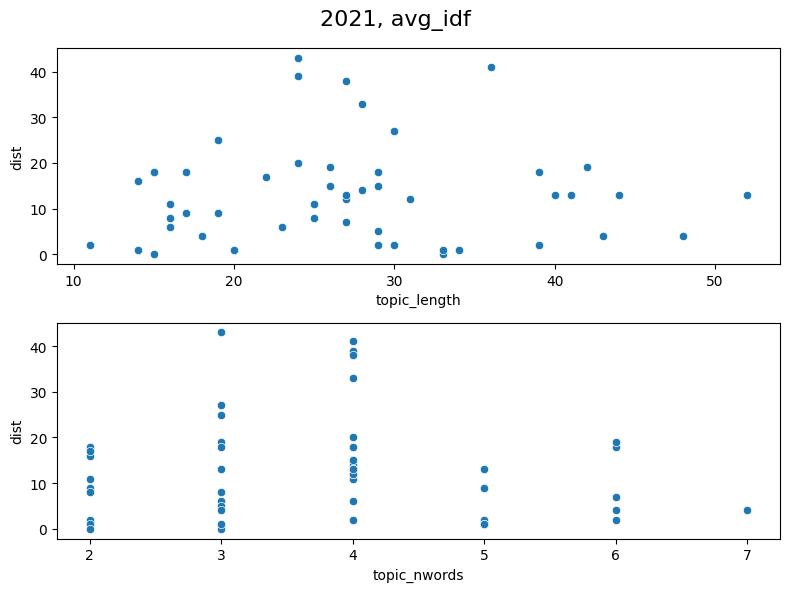

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

sns.scatterplot(x=scatter_data["topic_length"], y=scatter_data["dist"], ax=ax[0])
sns.scatterplot(x=scatter_data["topic_nwords"], y=scatter_data["dist"], ax=ax[1])

plt.suptitle(f"{corpus}, {metric}", fontsize=16)
plt.tight_layout()
plt.show()

In [50]:
palette = sns.color_palette("rocket_r", 5)  # Get 5 colors from 'rocket_r'
selected_colors = [palette[0], palette[1], palette[2], palette[3], palette[4]]

In [51]:
# Create a boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='controversy_round', y='helpful', data=boxplot_data)

# Apply different colors to each bin
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(selected_colors[i % len(selected_colors)])  # Cycle through colors

plt.xlabel("Controversia", fontsize=16)
plt.ylabel("Helpfulness", fontsize=16)
plt.title(f"{corpus.upper()}: Helpfulness", fontsize=18, fontweight="bold")

# Show the plot
plt.show()

ValueError: Could not interpret value `controversy_round` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_1290669/156280293.py:11: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  ax.xaxis.get_major_locator().set_params(integer=True)


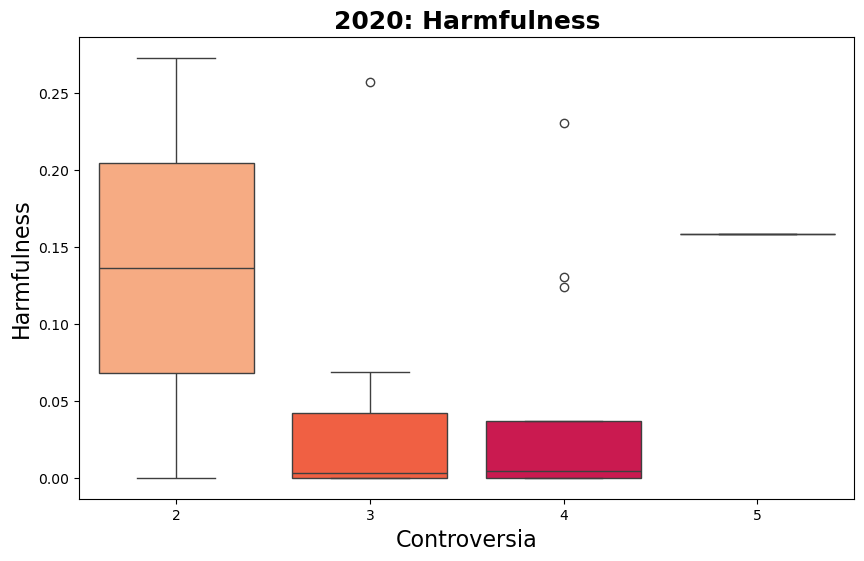

In [52]:
# Create a boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='controversy_round', y='harmful', data=boxplot_data)


# Apply different colors to each bin
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(selected_colors[i % len(selected_colors)])  # Cycle through colors


ax.xaxis.get_major_locator().set_params(integer=True)

plt.xlabel("Controversia", fontsize=16)
plt.ylabel("Harmfulness", fontsize=16)
plt.title(f"{corpus.upper()}: Harmfulness", fontsize=18, fontweight="bold")

# Show the plot
plt.show()

/tmp/ipykernel_1290669/2047313908.py:11: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  ax.xaxis.get_major_locator().set_params(integer=True)


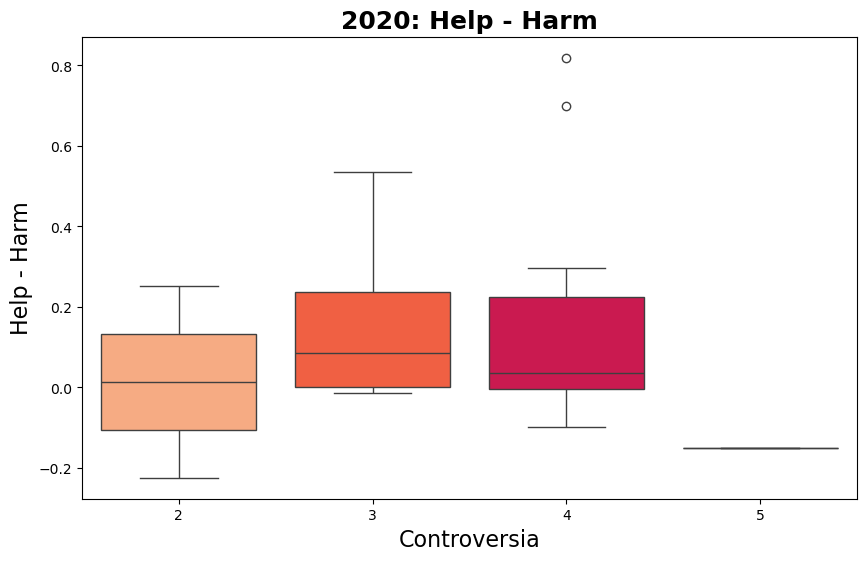

In [53]:
# Create a boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='controversy_round', y='diff', data=boxplot_data)


# Apply different colors to each bin
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(selected_colors[i % len(selected_colors)])  # Cycle through colors


ax.xaxis.get_major_locator().set_params(integer=True)

plt.xlabel("Controversia", fontsize=16)
plt.ylabel("Help - Harm", fontsize=16)
plt.title(f"{corpus.upper()}: Help - Harm", fontsize=18, fontweight="bold")

# Show the plot
plt.show()